In [ ]:

"""
Compare 50 day polynomial regressin with 10 day polynomial regression
"""

<AxesSubplot:xlabel='Date'>

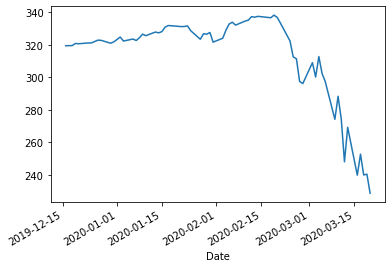

In [50]:
import pandas as pd
import pandas_datareader as dataReader
from datetime import datetime
%matplotlib inline
start = datetime(2019, 12, 15)
end = datetime(2020, 3, 20)
stock_data = dataReader.data.get_data_yahoo('SPY', start = start, end = end)
stock_closing_data = stock_data['Close'].copy()
stock_closing_data.plot()

In [57]:
stock_data.shape

(66, 6)

In [58]:
df_fifty = stock_data[10:60].copy()

In [59]:
import numpy as np
df_fifty['row_num'] = np.arange(len(df_fifty))
df_fifty.set_index(df_fifty.row_num)

,High,Low,Open,Close,Volume,Adj Close,row_num
row_num,,,,,,,
0,322.130005,320.149994,320.529999,321.859985,57077300.0,317.306335,0
1,324.890015,322.529999,323.540009,324.869995,59151200.0,320.273743,1
2,323.640015,321.100006,321.160004,322.410004,77709700.0,317.848572,2
3,323.730011,320.359985,320.489990,323.640015,55653900.0,319.061188,3
4,323.540009,322.239990,323.019989,322.730011,40496400.0,318.164032,4
5,325.779999,322.670013,322.940002,324.450012,68296000.0,319.859741,5
6,326.730011,325.519989,326.160004,326.649994,48473300.0,322.028564,6
7,327.459991,325.200012,327.290009,325.709991,53029300.0,321.101868,7
8,327.959991,325.920013,326.390015,327.950012,47086800.0,323.310181,8


In [60]:
df_ten = df_fifty[40:50].copy()

In [89]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
poly_features_fifty = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_fifty = poly_features_fifty.fit_transform(df_fifty[['row_num']])
from sklearn.linear_model import LinearRegression
lin_reg_fifty = LinearRegression()
lin_reg_fifty.fit(X_poly_fifty, df_fifty.Close)
lin_reg_fifty.predict([[20,400]])


array([336.00543079])

In [77]:
poly_features_ten = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_ten = poly_features_ten.fit_transform(df_ten[['row_num']])
from sklearn.linear_model import LinearRegression
lin_reg_ten = LinearRegression()
lin_reg_ten.fit(X_poly_ten, df_ten.Close)

LinearRegression()

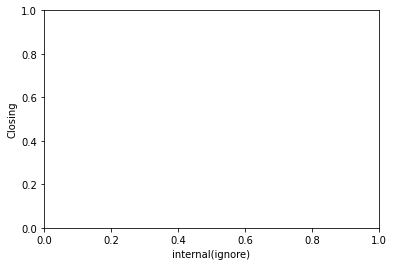

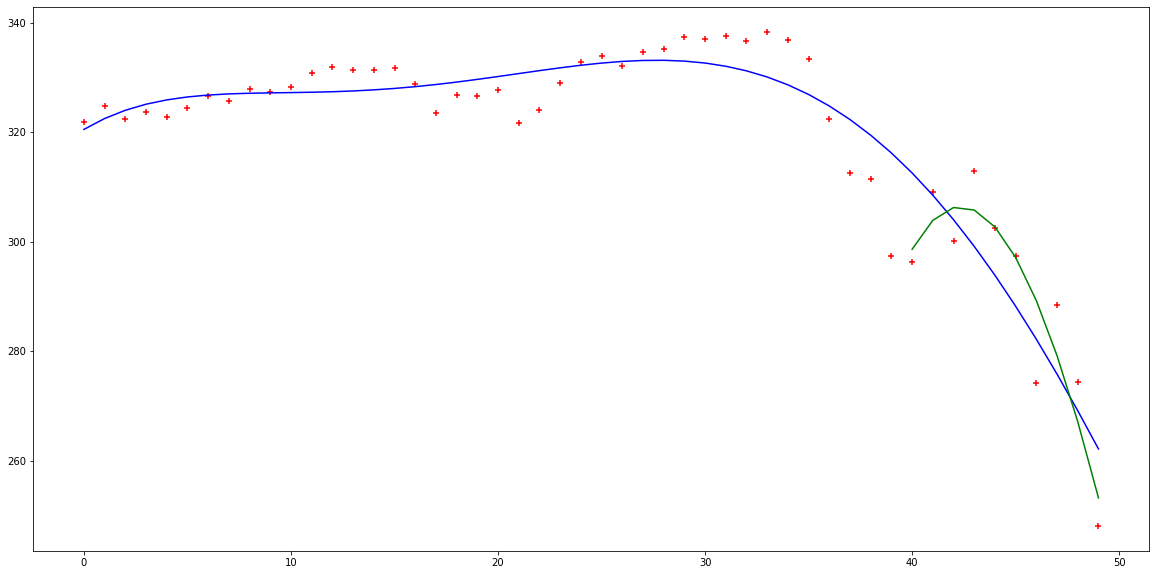

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('internal(ignore)')
plt.ylabel('Closing')
plt.figure(figsize=(20,10))
plt.scatter(df_fifty.row_num, df_fifty.Close, color = 'red', marker='+')
plt.plot(df_fifty.row_num,lin_reg_fifty.predict(X_poly_fifty), color='blue')
plt.plot(df_ten.row_num, lin_reg_ten.predict(X_poly_ten), color = 'green')

In [68]:
from sklearn.metrics import mean_squared_error
lin_reg_ten.mean_squared_error

AttributeError: 'LinearRegression' object has no attribute 'mean_squared_error'